In [1]:
%cd ..

c:\Users\Mirco\Desktop\CV_pw


In [2]:
from glob import glob
import cv2
import numpy as np
import os

In [3]:
def to_mask(img):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S

    img = img.astype('uint8')
    # Output dtype = cv2.CV_8U
    img = cv2.GaussianBlur(img, (3, 3), 0)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    cl = clahe.apply(grad)

    otsu_threshold, image_result = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

    FG = np.ones_like(image_result)

    BG = image_result.cumsum(0) == 0
    FG[BG] = 0

    BG = image_result[::-1].cumsum(0) == 0
    FG[BG[::-1]] = 0

    BG = image_result.cumsum(1) == 0
    FG[BG] = 0

    BG = image_result[:,::-1].cumsum(1) == 0
    FG[BG[:,::-1]] = 0

    return FG

In [44]:
def to_mask(img):
    scale = 1
    delta = 0
    ddepth = cv2.CV_16S

    img = img.astype('uint8')
    # Output dtype = cv2.CV_8U
    img = cv2.GaussianBlur(img, (3, 3), 0)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    cl = clahe.apply(grad)

    otsu_threshold, image_result = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

    analysis = cv2.connectedComponentsWithAlgorithm(255-image_result, 4, cv2.CV_16U, cv2.CCL_GRANA)
    return 1 - ( (analysis[1] == analysis[1][0,0]) | (analysis[1] == analysis[1][-1,-1]) | (analysis[1] == analysis[1][0,-1]) | (analysis[1] == analysis[1][-1,0]))

In [45]:
for i, filePath in enumerate(glob("DatasetDress/cloth/*.jpg")):
    name = os.path.basename(filePath)
    mask_name = filePath.replace("cloth", "cloth-mask")

    img = cv2.imread(filePath)
    mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE) / 255

    res = to_mask(img) / 1

    IoU = 2*(res*mask).sum()/(res+mask).sum()
    print(IoU)

    if IoU < 0.9:
        cv2.imshow("our", res)
        cv2.imshow("other", mask)
        cv2.imshow("original", img / 255)
        k = cv2.waitKey()
        if k == 27:
            cv2.destroyAllWindows()
            break
        cv2.destroyAllWindows()


    if i > 100:
        break

0.9682897771117674
0.9785183393463268
0.977815077132197
0.970438504054238
0.969464423238938
0.6503005053327069
0.9717235819135114
0.972367179029188
0.9719809517062883
0.9712699832426587
0.5367437091678035
0.9679454865893339
0.9697882662197826
0.20793337227840358
0.9686300972157116
0.9486903342364855
0.940460733102498
0.9439998860602836
0.40075874444806486
0.9591932661514883
0.950834183289407
0.3518124897692643
0.3679325938900584
0.9494245601974195
0.9602948793743663
0.38520309113612833
0.9734441662747572
0.9766237738889882
0.9684719524871755
0.20495889135027268
0.9625318891712518
0.959793576358368
0.953565383317324
0.967893602143276
0.9684917202865531
0.2884953679968177
0.9689657858593776
0.9711892622693232
0.9728544698255993
0.9753177238674955
0.9749885408042622
0.9755244357677224
0.9649033129702375
0.9651345434192067
0.9732542645235109
0.971871177536519
0.9628689877734709
0.9712363286802008
0.9699615221552881
0.9741939068782899
0.9738084052972691
0.2241057740649913
0.4360994987408491

# Grab Cut

In [46]:
import matplotlib.pyplot as plt

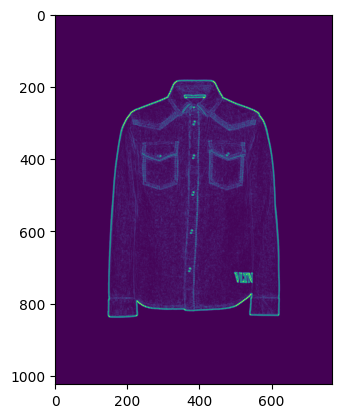

In [47]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
img = cv2.imread("dataset\\upper_body\\images\\denim_denim-shirts\\12176911ut_1_f.jpg")

# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(grad)
plt.show()

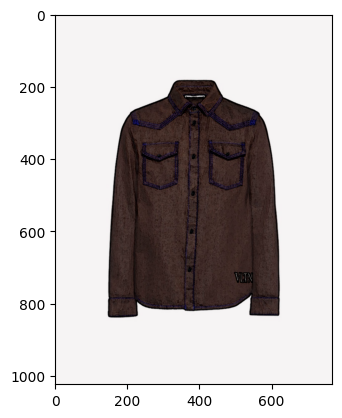

In [48]:
rich = img.astype(np.int16) - grad[...,None]

rich *= rich > 0
rich = rich.astype(np.uint8)
plt.imshow(rich)

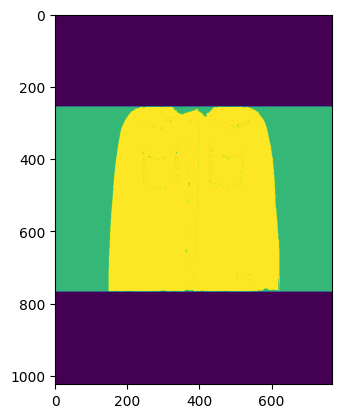

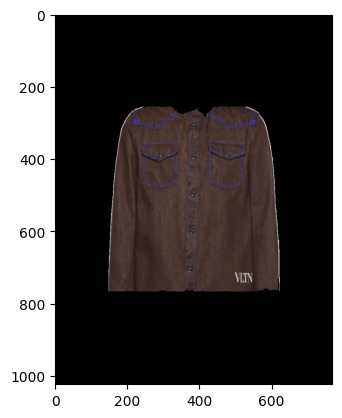

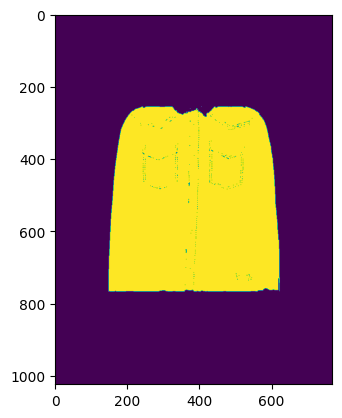

In [54]:
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

D = rich.shape[0] // 2 # scrap image
rect = (0,D//2,rich.shape[1], rich.shape[0]-D)
mask, bgdModel, fgdModel = cv2.grabCut(rich, None, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

plt.imshow(mask)
plt.show()
# 0 -> surly BG is fake -> must be set to 2
# 1 -> nothing is surly FG
# 2 -> probably BG
# 3 -> probably FG

mask2 = np.where((mask==2)|(mask==0),2,3).astype('uint8')
#mask2 = np.where((mask==1),0,1).astype('uint8')
img_seg = img*(mask2[...,np.newaxis] == 3)

# Display the image 
plt.imshow(img_seg)
plt.show()

plt.imshow(mask2)
plt.show()


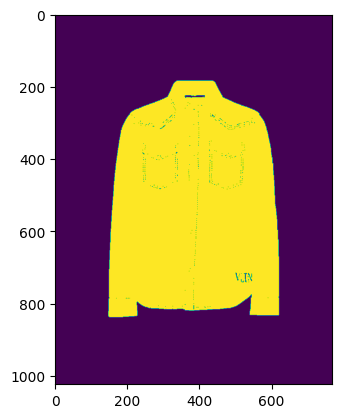

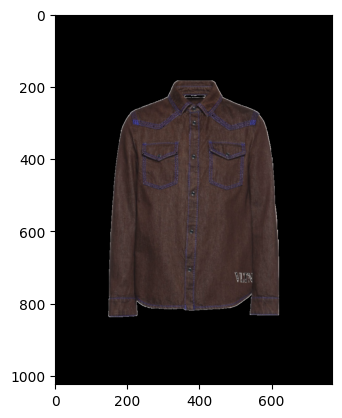

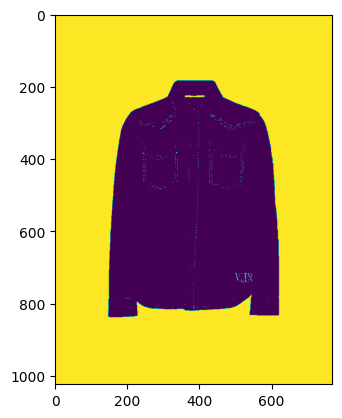

In [55]:
# Create 2 arrays for background and foreground model
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (5,5,grad.shape[1]-10, grad.shape[0]-10)
mask, bgdModel, fgdModel = cv2.grabCut(rich, mask2, None, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK)

plt.imshow(mask)
plt.show()

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#mask2 = np.where((mask==1),0,1).astype('uint8')
img_seg = img*mask2[:,:,np.newaxis]

# Display the image 
plt.imshow(img_seg)
plt.show()

plt.imshow(mask2==0)
plt.show()

In [57]:
def two_grab(img):
    img = cv2.GaussianBlur(img, (3, 3), 0)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)



    rich = img.astype(np.int16) - grad[...,None]

    rich *= rich > 0
    rich = rich.astype(np.uint8)



    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    D = rich.shape[0] // 4 # scrap image
    rect = (0,D//2,rich.shape[1], rich.shape[0]-D)
    mask, bgdModel, fgdModel = cv2.grabCut(rich, None, rect, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask==2)|(mask==0),2,3).astype('uint8')




    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    rect = (5,5,grad.shape[1]-10, grad.shape[0]-10)
    mask, bgdModel, fgdModel = cv2.grabCut(rich, mask2, None, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK)

    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    #mask2 = np.where((mask==1),0,1).astype('uint8')
    return mask2

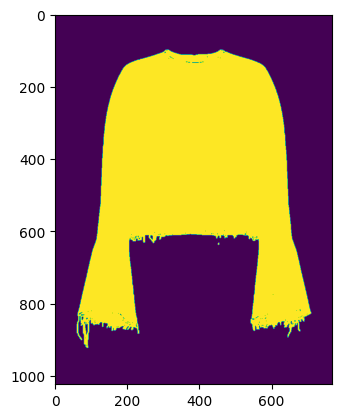

In [58]:
img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
mask = two_grab(img)
plt.imshow(mask)
plt.show()

In [59]:
for i, filePath in enumerate(glob("DatasetDress/cloth/*.jpg")):
    name = os.path.basename(filePath)
    mask_name = filePath.replace("cloth", "cloth-mask")

    img = cv2.imread(filePath)
    mask = cv2.imread(mask_name, cv2.IMREAD_GRAYSCALE) / 255

    res = two_grab(img) / 1

    IoU = 2*(res*mask).sum()/((res+mask)>0).sum()
    print(IoU)

    dice = 2*(res*mask).sum()/(res+mask).sum()
    print(IoU)

    if IoU < 0.9:
        cv2.imshow("our", res)
        cv2.imshow("other", mask)
        cv2.imshow("original", img / 255)
        cv2.waitKey()
        cv2.destroyAllWindows()


    if i > 100:
        break

0.9653020948640563
0.9827105120635864
0.9825843552801855
0.9816833573840699
0.9773172749348444
0.5139148422125664
0.9030962119938326
0.9391096823697481
0.9827082020619111
0.9798236515706911
0.46595189478789434
0.9590888620977701
0.9488031950268524
0.11728431267794123
0.9413231263587177
0.9424653975358647
0.6901092198121391
0.9449755066891008
0.6797856350225538
0.7436160792370466
0.939483018834006
0.8836468784747136
0.9615096898367296
0.9670715304242509
0.9209155588748832
0.8512773738703456
0.9875774041224807
0.9679813419261363
0.9726056116029647
0.9746946038579518
0.9779880237943923
0.97291676827432
0.9722696747726163
0.9808199182420628
0.9640810609740812
0.0
0.9454189218549092
0.9814980217194141
0.9830892041218928
0.9868596448786575
0.9111942888555075
0.9371339963518536
0.9778161974090113
0.9732111265211333
0.9193164833190205
0.9848400930804218
0.9754614132619385
0.9799690183605568
0.981552198527726
0.9775362943932574
0.1647259468864184
0.11398032464578794
0.5053430225354415
0.8106600

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\grabcut.cpp:386: error: (-215:Assertion failed) !bgdSamples.empty() && !fgdSamples.empty() in function 'initGMMs'


# Grana

(9759, array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16))


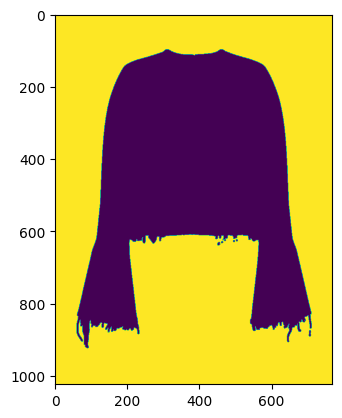

In [ ]:
img = cv2.imread(r"dataset\upper_body\images\denim_denim-shirts\38814303li_1_f.jpg")
scale = 1
delta = 0
ddepth = cv2.CV_16S

img = img.astype('uint8')
# Output dtype = cv2.CV_8U
img = cv2.GaussianBlur(img, (3, 3), 0)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Gradient-Y
# grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl = clahe.apply(grad)

otsu_threshold, image_result = cv2.threshold(cl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

#image_result = image_result / 255

analysis = cv2.connectedComponentsWithAlgorithm(255-image_result, 4, cv2.CV_16U, cv2.CCL_GRANA)

print(analysis)
plt.plot()

plt.imshow(analysis[1] == analysis[1][0,0])